In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from config import name, data_path, parse_proteins_in_file

import os 

os.getcwd()
os.makedirs(f"Data/{name}", exist_ok=True)
os.makedirs(f"Plots/{name}", exist_ok=True)

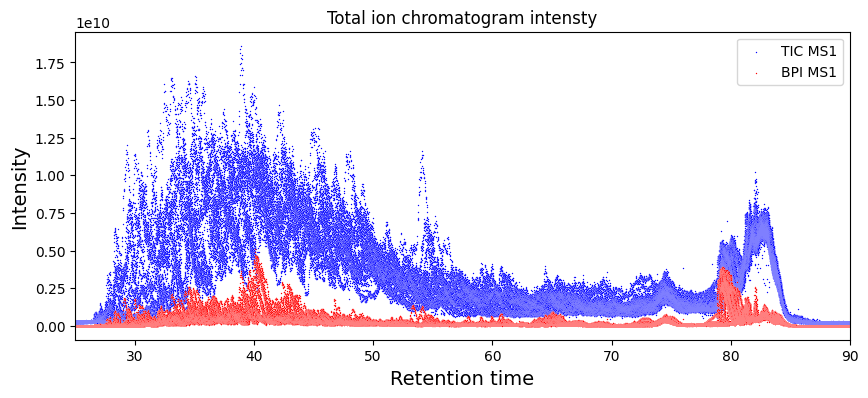

In [71]:
## Ms Scans file
ms = pd.read_csv(data_path + "msScans.txt", sep="\t", low_memory=False)
retentionTimeIntensity = ms[["Retention time", "Total ion current", "Base peak intensity"]].sort_values("Retention time")

fig = plt.figure(figsize=(10, 4))

plt.title("Total ion chromatogram intensty")

plt.ylabel("Intensity", fontsize=14)
plt.xlabel("Retention time", fontsize=14)

scatter = sns.scatterplot(retentionTimeIntensity.dropna(), x="Retention time", y="Total ion current", color="blue", s=1, label="TIC MS1")
scatter = sns.scatterplot(retentionTimeIntensity.dropna(), x="Retention time", y="Base peak intensity", color="red", s=1, label="BPI MS1")

scatter.set_xlim(25, 90)
scatter.legend(loc="upper right")

fig.savefig(f"Plots/{name}/Total_ion_chromatogram.png", bbox_inches="tight", dpi=200)

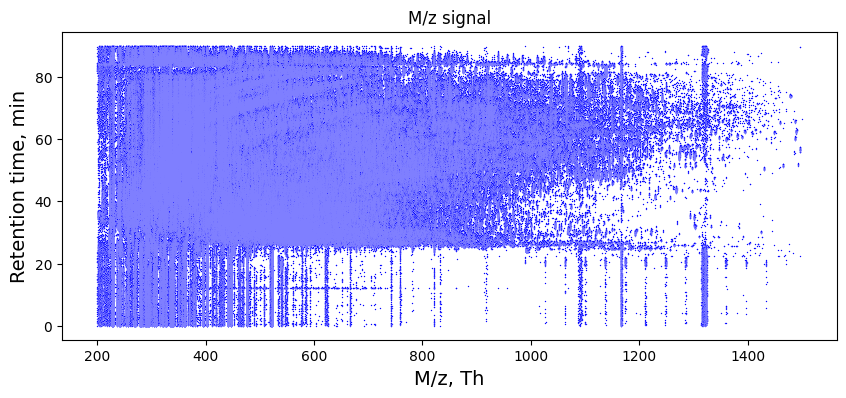

In [72]:
## Msms Scans file
msms = pd.read_csv(data_path + "msmsScans.txt", sep="\t", low_memory=False)
data = msms[["Retention time", "m/z"]].sort_values("Retention time")


fig = plt.figure(figsize=(10, 4))

plt.title("M/z signal")
plt.ylabel("Retention time, min", fontsize=14)
plt.xlabel("M/z, Th", fontsize=14)

scatter = sns.scatterplot(data.dropna(), x="m/z", y="Retention time", color="blue", s=1, label="Signal", legend=False)

fig.savefig(f"Plots/{name}/M_z_signal.png", bbox_inches="tight", dpi=200)

In [2]:
protein_set = parse_proteins_in_file("Data/whole_protein_set.txt")
    
proteins = pd.read_csv(data_path + "proteinGroups.txt", sep="\t", low_memory=False, index_col=0) \
    .dropna(subset=["Taxonomy names"], axis=0)

proteins = proteins.loc[proteins["Taxonomy names"].str.contains("Homo sapiens")]
proteins.index =  proteins.index.map(lambda x: x.split(";")[0])

subset = proteins.loc[protein_set]

inflammation = pd.read_csv("Data/Olink_Inflammation_2.csv", sep=";")
inflammation = inflammation["UniProt ID"].to_list()

proteins.head()

,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,Razor + unique peptides,...,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions,Taxonomy IDs,Taxonomy names
Protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A0C4DH55,A0A0C4DH55;A0A075B6H7;P01624,1;1;1,1;1;1,1;1;1,Ig kappa chain V-III region POM,IGKV3D-7;IGKV3-7,sp|A0A0C4DH55|KVD07_HUMAN Immunoglobulin kappa...,3,1,1,...,3297;3298,20898;20899;20900;20901;20902;20903;20904;2090...,41545;41546;41547;41548;41549;41550;41551;4155...,41553,NaN,NaN,NaN,NaN,9606;9606;9606,Homo sapiens;Homo sapiens;Homo sapiens
A0A075B6I0,A0A075B6I0,1,1,1,NaN,IGLV8-61,sp|A0A075B6I0|LV861_HUMAN Immunoglobulin lambd...,1,1,1,...,1722,11599;11600;11601,23127;23128;23129;23130,23129,NaN,NaN,NaN,NaN,9606,Homo sapiens
A0A075B6J9,A0A075B6J9,1,1,1,NaN,IGLV2-18,sp|A0A075B6J9|LV218_HUMAN Immunoglobulin lambd...,1,1,1,...,6085,40023;40024,81885;81886,81886,NaN,NaN,NaN,NaN,9606,Homo sapiens
A0A075B6K2,A0A075B6K2,1,1,1,NaN,IGLV3-12,sp|A0A075B6K2|LV312_HUMAN Immunoglobulin lambd...,1,1,1,...,1723,11602,23131,23131,NaN,NaN,NaN,NaN,9606,Homo sapiens
A0A075B6K4,A0A075B6K4,3,3,2,NaN,IGLV3-10,sp|A0A075B6K4|LV310_HUMAN Immunoglobulin lambd...,1,3,3,...,2639;4785;4786,16830;16831;16832;16833;16834;16835;16836;1683...,33697;33698;33699;33700;33701;33702;33703;3370...,33699;60671;60673,NaN,NaN,NaN,NaN,9606,Homo sapiens


In [30]:
bgcolor = '#fff0f3' # "#edf2fb", "fff0f3" ["feeafa"]
plt.rcdefaults()
plt.rcParams['axes.facecolor']=bgcolor
plt.rcParams['savefig.facecolor']="edf2fb"

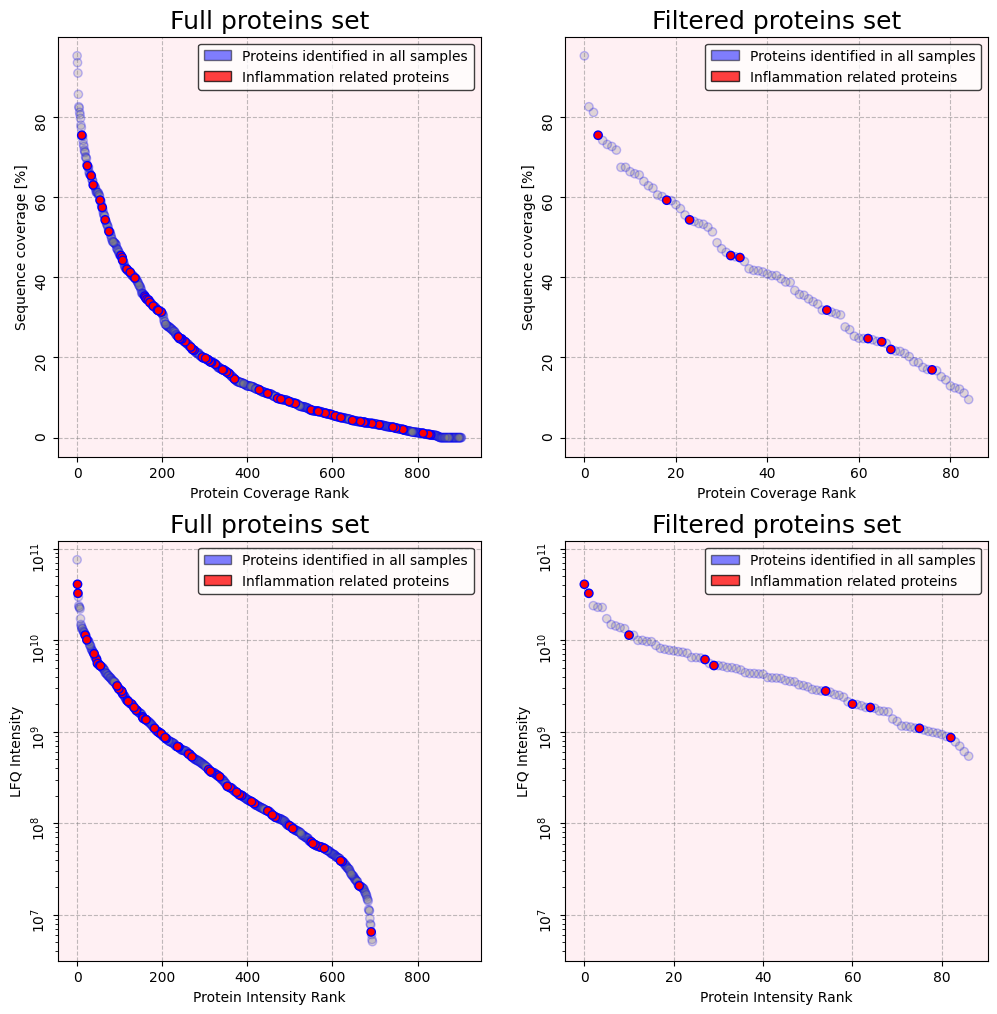

In [32]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

coverage = proteins\
    .sort_values("Sequence coverage [%]", ascending=False)[['Sequence coverage [%]']] \
    .reset_index().reset_index(names="Protein Coverage Rank").set_index("Protein IDs")

coverage["Names"] = coverage.index.map(lambda x: x if x in inflammation else None)
coverage["Color"] = coverage.index.map(lambda x: "red" if x in inflammation else "grey")
coverage["Alpha"] = coverage.index.map(lambda x: 1 if x in inflammation else 0.25).astype(float)

coverage = coverage.sort_values("Alpha", ascending=True)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

axes[0, 0].set_title("Full proteins set", fontsize=18)

axes[0, 0].set_axisbelow(True)
axes[0, 0].grid(color='gray', linestyle='dashed', alpha=0.5)

scatter1 = sns.scatterplot(
    ax=axes[0, 0],
    data=coverage, 
    x="Protein Coverage Rank", 
    y="Sequence coverage [%]", 
    c=coverage["Color"], 
    alpha=coverage["Alpha"], 
    edgecolor="blue", 
    linewidth=1
)

scatter1.tick_params(axis='y', labelrotation=90)


scatter1.legend(
    handles=[
        mpatches.Patch(facecolor='blue', label='Proteins identified in all samples', alpha=0.5, edgecolor="black"),
        mpatches.Patch(facecolor='red', label='Inflammation related proteins', alpha=0.75, edgecolor="black")
    ], 
    loc="upper right",
    facecolor='white', 
    edgecolor="black",
    framealpha=0.75, 
)

coverage = subset\
    .sort_values("Sequence coverage [%]", ascending=False)[['Sequence coverage [%]']] \
    .reset_index().reset_index(names="Protein Coverage Rank").set_index("Protein IDs") \

coverage = coverage.loc[coverage["Sequence coverage [%]"] >= 5]

coverage["Names"] = coverage.index.map(lambda x: x if x in inflammation else None)
coverage["Color"] = coverage.index.map(lambda x: "red" if x in inflammation else "grey")
coverage["Alpha"] = coverage.index.map(lambda x: 1 if x in inflammation else 0.25).astype(float)

coverage = coverage.sort_values("Alpha", ascending=True)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

axes[0, 1].set_title("Filtered proteins set", fontsize=18)

axes[0, 1].set_axisbelow(True)
axes[0, 1].grid(color='gray', linestyle='dashed', alpha=0.5)

scatter2 = sns.scatterplot(
    ax=axes[0, 1],
    data=coverage, 
    x="Protein Coverage Rank", 
    y="Sequence coverage [%]", 
    c=coverage["Color"], 
    alpha=coverage["Alpha"], 
    edgecolor="blue", 
    linewidth=1
)

scatter2.tick_params(axis='y', labelrotation=90)


scatter2.legend(
    handles=[
        mpatches.Patch(facecolor='blue', label='Proteins identified in all samples', alpha=0.5, edgecolor="black"),
        mpatches.Patch(facecolor='red', label='Inflammation related proteins', alpha=0.75, edgecolor="black")
    ], 
    loc="upper right",
    facecolor='white', 
    edgecolor="black",
    framealpha=0.75, 
)


intensity = proteins \
    .sort_values("Intensity", ascending=False)[["Intensity"]].rename(columns={"Intensity" : "LFQ Intensity"}) \
    .reset_index().reset_index(names="Protein Intensity Rank").set_index("Protein IDs")

intensity["Names"] = intensity.index.map(lambda x: x if x in inflammation else None)
intensity["Color"] = intensity.index.map(lambda x: "red" if x in inflammation else "grey")
intensity["Alpha"] = intensity.index.map(lambda x: 1 if x in inflammation else 0.25).astype(float)

intensity = intensity.sort_values("Alpha", ascending=True)#.reset_index(drop=True)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

axes[1, 0].set_title("Full proteins set", fontsize=18)

axes[1, 0].set_axisbelow(True)
axes[1, 0].grid(color='gray', linestyle='dashed', alpha=0.5)

scatter3 = sns.scatterplot(
    ax=axes[1, 0],
    data=intensity, 
    x="Protein Intensity Rank", 
    y="LFQ Intensity", 
    c=intensity["Color"], 
    alpha=intensity["Alpha"], 
    edgecolor="blue", 
    linewidth=1
)

scatter3.set(yscale="log")
scatter3.tick_params(axis='y', labelrotation=90)

scatter3.legend(
    handles=[
        mpatches.Patch(facecolor='blue', label='Proteins identified in all samples', alpha=0.5, edgecolor="black"),
        mpatches.Patch(facecolor='red', label='Inflammation related proteins', alpha=0.75, edgecolor="black")
    ], 
    loc="upper right",
    facecolor='white', 
    edgecolor="black",
    framealpha=0.75, 
)


intensity = subset \
    .sort_values("Intensity", ascending=False)[["Intensity"]].rename(columns={"Intensity" : "LFQ Intensity"}) \
    .reset_index().reset_index(names="Protein Intensity Rank").set_index("Protein IDs")

intensity["Names"] = intensity.index.map(lambda x: x if x in inflammation else None)
intensity["Color"] = intensity.index.map(lambda x: "red" if x in inflammation else "grey")
intensity["Alpha"] = intensity.index.map(lambda x: 1 if x in inflammation else 0.25).astype(float)

intensity = intensity.sort_values("Alpha", ascending=True)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

axes[1, 1].set_title("Filtered proteins set", fontsize=18)

axes[1, 1].set_axisbelow(True)
axes[1, 1].grid(color='gray', linestyle='dashed', alpha=0.5)

scatter4 = sns.scatterplot(
    ax=axes[1, 1],
    data=intensity, 
    x="Protein Intensity Rank", 
    y="LFQ Intensity", 
    c=intensity["Color"], 
    alpha=intensity["Alpha"], 
    edgecolor="blue", 
    linewidth=1
)

scatter4.set(yscale="log")
scatter4.tick_params(axis='y', labelrotation=90)

scatter4.legend(
    handles=[
        mpatches.Patch(facecolor='blue', label='Proteins identified in all samples', alpha=0.5, edgecolor="black"),
        mpatches.Patch(facecolor='red', label='Inflammation related proteins', alpha=0.75, edgecolor="black")
    ], 
    loc="upper right",
    facecolor='white', 
    edgecolor="black",
    framealpha=0.75, 
)



axes[0, 1].set_ylim(axes[0, 0].get_ylim())
axes[1, 1].set_ylim(axes[1, 0].get_ylim())

# axes[1, 0].set_xticks(axes[0, 0].get_xticks())
# axes[1, 1].set_yticks(axes[1, 0].get_yticks()[1:])

# axes[1, 1] = axes[0, 1].twinx()

# sns.despine(offset=10, trim=True)

fig.savefig(f"Plots/{name}/coverage_and_intensity.png", dpi=300, bbox_inches="tight")

In [3]:
pneuma = parse_proteins_in_file("Data/only_pneumonia.txt")

pneumonia_table = proteins.loc[pneuma]
pneumonia_table["Protein names"] = pneumonia_table["Protein names"].map(lambda x: x.split(";")[0])

pneumonia_table = pneumonia_table[["Protein names", "Gene names", "Sequence coverage [%]", "iBAQ"]].reset_index()
pneumonia_table["iBAQ"] = pneumonia_table["iBAQ"].apply(np.log10)

pneumonia_table.to_excel("Data/pneumonia_table.xlsx", index=False)

In [28]:
de = parse_proteins_in_file("Data/de_proteins.txt")

de_table = proteins.loc[de]
de_table["Protein names"] = de_table["Protein names"].map(lambda x: x.split(";")[0])

de_table = de_table[["Protein names", "Gene names", "Sequence coverage [%]", "iBAQ"]].reset_index()
de_table["iBAQ"] = de_table["iBAQ"].apply(np.log10)

de_table.to_excel("Data/de_table.xlsx", index=False)

In [12]:
(proteins[[col for col in proteins.columns.to_list() if col.find("Intensity ") > -1]] != 0).sum(0).median()

162.5

In [50]:
import functools

proteins = [*functools.reduce(lambda x, y: {*x, *y}, [i.split(";") for i in proteins["Protein IDs"].to_list()])]
[i for i in proteins if i in inflammationProteins];

In [144]:
import pandas as pd

data.T.reset_index().stack(future_stack=True)

TypeError: stack() got an unexpected keyword argument 'future_stack'

/home/tools/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


KeyError: "None of [Index(['x'], dtype='object')] are in the [columns]"

<Figure size 1000x500 with 0 Axes>

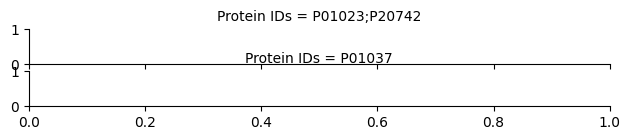

In [137]:
fig = plt.figure(figsize=(10, 5))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data.T.reset_index()[:2], row="Protein IDs", hue="Protein IDs", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)


plt.show()

/home/tools/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'iBAQ')

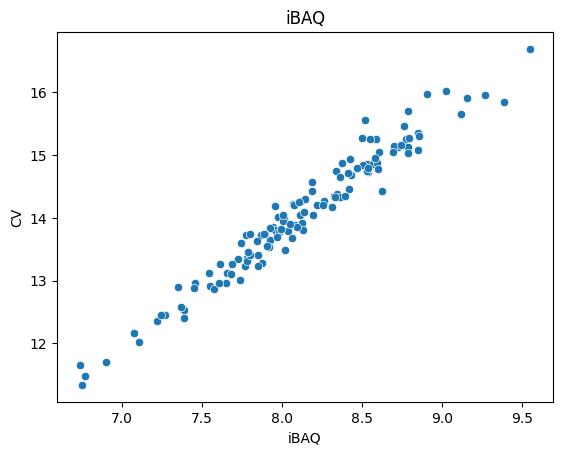

In [75]:
sns.scatterplot(x=np.log10(ibaq1), y=np.log10(np.var(ibaq+1, axis=1)))
plt.ylabel("CV")
plt.xlabel("iBAQ")
plt.title("iBAQ")

/home/tools/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/tools/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Text(0.5, 1.0, 'Correlation Coef: [[nan nan]\n [nan nan]]')

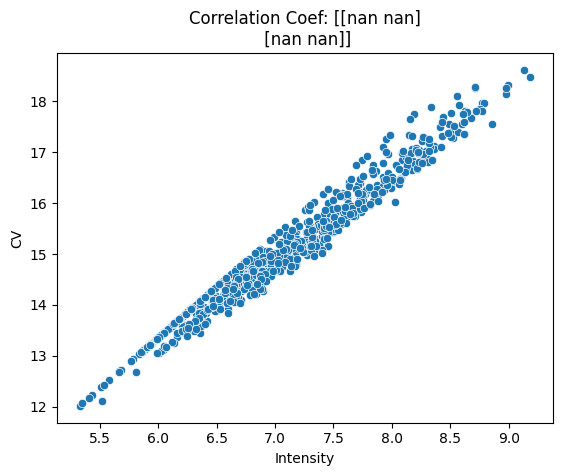

In [76]:
mean = np.log10(intensity.mean(axis=1))
var = np.log10(np.var(intensity, axis=1))

cor = np.corrcoef(mean, var)
sns.scatterplot(x=mean, y=var)

plt.xlabel("Intensity")
plt.ylabel("CV")

plt.title(f"Correlation Coef: {cor}")

In [170]:
from scipy import stats

stats.pearsonr(mean.values, var.values)

/home/tools/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4831: RuntimeWarning: invalid value encountered in subtract
  xm = x.astype(dtype) - xmean
/home/tools/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4832: RuntimeWarning: invalid value encountered in subtract
  ym = y.astype(dtype) - ymean


ValueError: array must not contain infs or NaNs